# 6.3  Logistic Regression and the Softmax Cost

- In the previous Section we saw how to derive logistic regression when employing label values $y_p \in \left\{0,+1\right\}$.  


- However as mentioned in the previous Section these label values are somewhat arbitrary, and one can just as easily derive logistic regression using label values $y_p \in \left\{-1,+1\right\}$.  


- In this Section we do just this, resulting in new cost function called the *Softmax cost* for logistic regression.  

- While the Softmax differs in form from the Cross Entropy cost, it is in fact equivalent to it (as we will show as well).  


- This means that - practically speaking - one can use either the Softmax or Cross Entropy in practice to achieve equivalent results.


- However - in principle - the Softmax cost is far more valuable helps unify the diverse set of motivations for linear two-class classification (as we will see in the Sections that follow). 

- You can toggle the code on and off in this presentation via the button below.

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# This code cell will not be shown in the HTML version of this notebook
# import custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib
datapath = '../../mlrefined_datasets/superlearn_datasets/'

# demos for this notebook
regress_plotter = superlearn.lin_regression_demos
optimizers = optlib.optimizers
static_plotter = optlib.static_plotter.Visualizer();

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 

# This is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## Different labels, same story

- If we change the label values from $y_{p}\in\left\{0,\,1\right\}$ to $y_{p}\in\left\{-1,\,+1\right\}$ much of the story we saw unfold in the previously Section unfolds here as well, with only slight differences.  


- That is, instead of our data ideally sitting on a step function (with linear boundary) with lower / upper steps taking on the values $0$ and $1$ respectively, they take on values $-1$ and $+1$ as shown below for prototypical cases where $N=1$ (left panel) and $N=2$ (right panel).

  <img src= '../../mlrefined_images/superlearn_images/Fig_4_10_new.png' width="80%" height="60%" alt=""/>

- This step function taking on values $\left\{-1,+1\right\}$, having a *linear boundary between its bottom and top steps*

\begin{equation}
\text{sign}\left(\mathring{\mathbf{x}}_{\,}^{T}\mathbf{w}^{\,}\right)
\end{equation}


- Here we use our compact vector notation used in the previous Section and where the $\text{sign}\left(\cdot\right)$ function is defined as

\begin{equation}
\text{sign}(x) = 
\begin{cases}
+1 \,\,\,\,\,\text{if} \,\, x \geq 0 \\
-1 \,\,\,\,\,\text{if} \,\, x < 0 \\
\end{cases}.
\end{equation}

- Notice in this case that our linear decision boundary lies along those $\mathring{\mathbf{x}}_{\,}^{T}$ where $\mathring{\mathbf{x}}_{\,}^{T}\mathbf{w}^{\,} = 0$.


- As with data using labels $0$ and $1$  (see Example 1 in the previous Section), linear regression would in general provide poor performance for data of this sort.  


- Because we want to tune the weights of our model $\mathbf{w}$ so that our parameterized step function maps inputs to outputs correctly as

\begin{equation}
\text{sign}\left(\mathring{\mathbf{x}}_{p}^{T}\mathbf{w}^{\,}\right) \approx y_p
\end{equation}



- We could employ a Least Squares cost function involving $\text{sign}\left(\cdot\right)$ directly as 

\begin{equation}
g(\mathbf{w}) = \frac{1}{P}\sum_{p=1}^P \left(\text{sign}\left(\left(\mathring{\mathbf{x}}_{p}^{T}\mathbf{w}^{\,}\right) \right) - y_p \right)^2.
\end{equation}

- However like the analagous Least Squares cost involving a step function in the previous Section, this is discontinuous, completely flat everywhere, and cannot be optimized easily.  

##  The $\text{tanh}$ logistic sigmoid function

- We could then look to replace the discrete $\text{sign}\left(\cdot\right)$ with a *smooth approximation*.   


- A slightly re-scaled version of the *sigmoid* function - so that its values range between $-1$ and $1$ instead of $0$ and $1$ - serves this purpose well.  


- This scaled version of the sigmoid is often called the *hyperbolic tangent function* and is written as 

\begin{equation}
\text{tanh}(x) = 2\,\sigma\left(x\right) - 1 = \frac{2}{1 + e^{-x}} - 1.
\end{equation}

- Given that the sigmoid function $\sigma\left(\cdot\right)$ ranges smoothly between $0$ and $1$, it is easy to see why $\text{tanh}\left(\cdot\right)$ as defined above ranges smoothly between $-1$ and $+1$. 


- In the figure below we plot the tanh function (left panel), as well as several internally weighted versions of it (right panel). 


- As we can see in the figure, for the correct setting of internal weights the hyperbolic tangent function can be made to look arbitrarily similar to the sign function.

  <img src= '../../mlrefined_images/superlearn_images/Fig_4_11_new.png' width="80%" height="80%" alt=""/>

##  Logistic regression using the Least Squares cost

- Replacing $\text{sign}\left(\cdot\right)$ with $\text{tanh}\left(\cdot\right)$ gives a similar desired relationship (assuming ideal weights are known)


\begin{equation}
\text{tanh}\left(\mathring{\mathbf{x}}_{p}^{T}\mathbf{w}^{\,}\right) \approx y_p
\end{equation}


- The analagous Least Squares cost function for recovering these weights


\begin{equation}
g(\mathbf{w}) = \frac{1}{P}\sum_{p=1}^P \left(\text{tanh}\left(\left(\mathring{\mathbf{x}}_{p}^{T}\mathbf{w}^{\,}\right) \right) - y_p \right)^2.
\end{equation}


- However this Least Squares cost (visualized below) is non-convex and has large flat regions that can impair optimization progress.  

#### <span style="color:#a50e3e;">Example. </span> Visualizing various cost functions on a toy dataset

- Below the Least Squares cost in equation for the dataset displayed in Example 1, over a wide range of values for $w_0$ and $w_1$.  


- This cost consists of discrete steps at many different levels, each one completely flat.  


- Because of this no local method can be used to minimize the counting cost.


- In the middle and right panels we plot the surfaces of two related cost functions on the same dataset we discuss below.

<IPython.core.display.Javascript object>


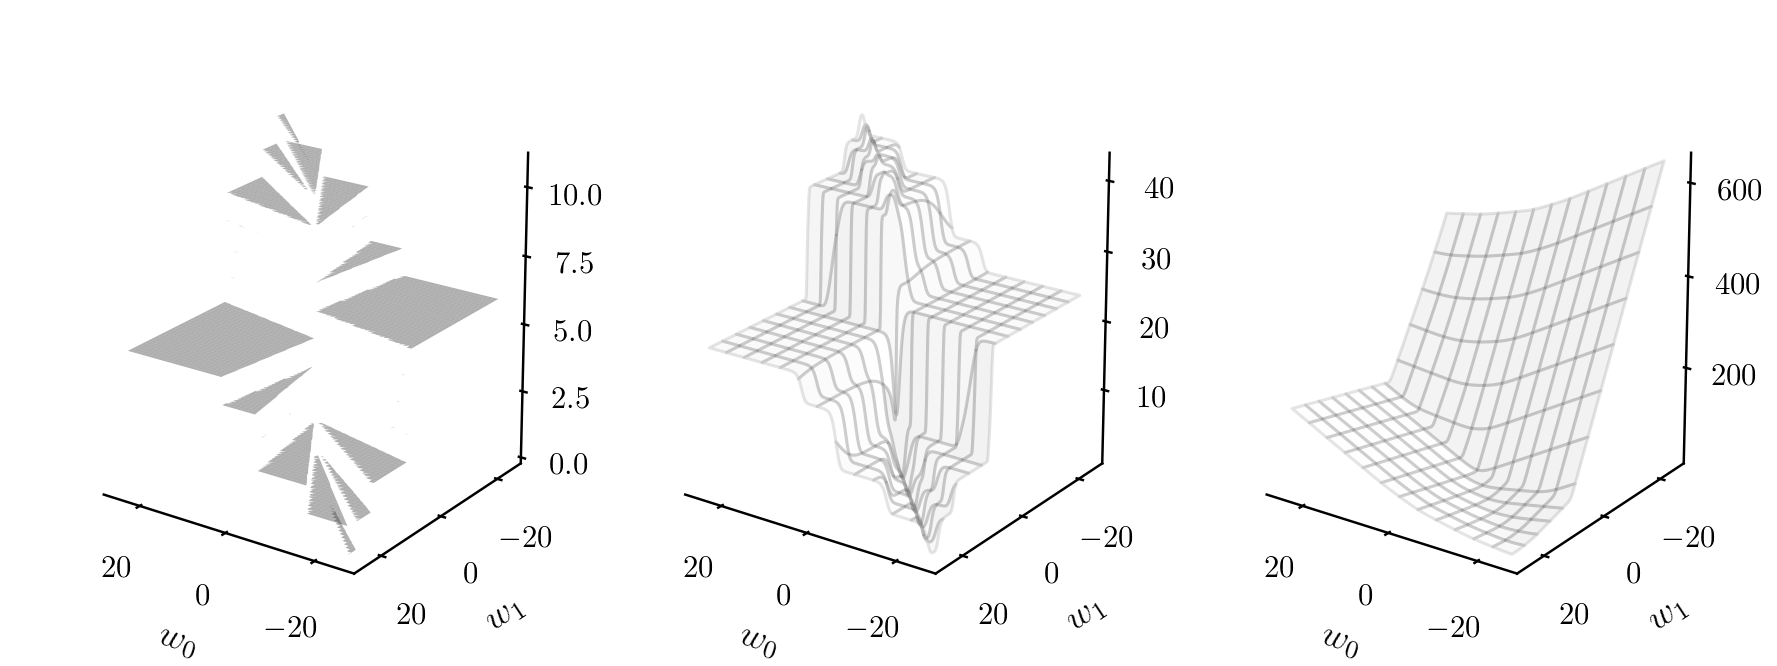

In [2]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
data = np.loadtxt(datapath + '2d_classification_data_v1.csv',delimiter = ',')

# create an instance of the visualizer and plot
demo2 = superlearn.cost_viewer.Visualizer(data)
demo2.plot_costs(viewmax = 25,view = [20,125])

## Logistic regression using the Softmax cost

- Because $y_p \in \left\{-1,+1\right\}$ here we can construct a new cost function based on a penalty that more harshly penalizes error.  


- Note that if we rearrange the hyperbolic tangent function in terms of the sigmoid we have 


\begin{equation}
\sigma\left(x\right) = \frac{\text{tanh}(x) + 1}{2}.
\end{equation}


- Studying this relationship we can note, in particular, that

\begin{equation}
\begin{array}
\
    \text{tanh}\left(x\right) \approx +1 \iff \sigma\left(x\right) \approx 1 \\
    \text{tanh}\left(x\right) \approx -1 \iff \sigma\left(x\right) \approx 0. \\
\end{array}
\end{equation}

- Because of this relationship we can employ *point-wise cost function* called the *Log Error* only our current label values


\begin{equation}
g_{p}\left(\mathbf{w}\right)=
\begin{cases}
-\text{log}\left(\sigma\left( \mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,} \right) \right) \,\,\,\,\,\,\,\,\,\,  \,\,\,\,  \text{if} \,\, y_p = +1 \\
-\text{log}\left(1 - \sigma\left( \mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,} \right) \right) \,\,\,\,\,\text{if} \,\, y_p = -1. \\
\end{cases}
\end{equation}

- This point-wise cost function is always nonnegative, and harshly penalizes classification errors.  


- In short with *ideal* weights $\mathbf{w}$ when $y_p = +1$ then $\text{tanh}\left(\mathring{\mathbf{x}}_{\,}^T\mathbf{w}^{\,}\right) \approx +1$ and the top condition gives $-\text{log}\left(\sigma\left( \mathring{\mathbf{x}}_{\,}^T\mathbf{w}^{\,} \right)\right) \approx -\text{log}\left(1 \right) = 0$ and is very large otherwise.  


- Likewise when $y_p = -1$ with ideal weights $\text{tanh}\left(\mathring{\mathbf{x}}_{\,}^T\mathbf{w}^{\,}\right) \approx -1$ and the bottom case is likewise approximately $-\text{log}\left(1 \right) = 0$ (and severely punishes errors).

- We can then form the *Softmax* cost for logistic regression by taking an average of these Log Error costs as 


\begin{equation}
g\left(\mathbf{w}\right) = \frac{1}{P}\sum_{p=1}^P g_p\left(\mathbf{w}\right). 
\end{equation}


- As with the Cross Entropy cost it is far more common to express the Softmax cost differently by re-writing the Log Error in a equivalent way as follows. 

 - First notice that because 


\begin{equation}
1 - \sigma\left(x\right) = 1 - \frac{1}{1 + e^{-x}} = \frac{1}{1 + e^{x}} = \sigma(-x)
\end{equation}


- The second case in the point-wise cost above can be re-written equivalently as $-\text{log}\left(\sigma\left( - \mathring{\mathbf{x}}_{\,}^T\mathbf{w}^{\,} \right)\right)$ and so the point-wise cost function can be written as


\begin{equation}
g_{p}\left(\mathbf{w}\right)=
\begin{cases}
-\text{log}\left(\sigma\left( \mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,} \right) \right) \,\,\,\,\,\,\,\, \,  \text{if} \,\, y_p = +1 \\
-\text{log}\left(\sigma\left( -\mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,} \right) \right) \,\,\,\,\,\text{if} \,\, y_p = -1. \\
\end{cases}
\end{equation}

- Now notice that *because we are using the label values $\pm 1$* we can move the label value in each case *inside* the inner most paraenthesis, and we can write *both cases* in a single line as 


\begin{equation}
g_p\left(\mathbf{w}\right)=
-\text{log}\left(\sigma\left( y_p\,\mathring{\mathbf{x}}_{p}^T\mathbf{w}^{\,} \right) \right).
\end{equation}


- Finally since the negative log property states that $-\text{log}\left(x\right) = \frac{1}{x}$ we can re-write the point-wise cost above equivalently (using the definition of the sigmoid) as 


\begin{equation}
g_p\left(\mathbf{w}\right)=
\text{log}\left(1 + e^{-\overset{\,}{y}_p^{\,}\mathring{\mathbf{x}}_{p}^{T}\mathbf{w}^{\,}}\right)
\end{equation}

- Taking the average of this point-wise cost over all $P$ points we have a more common appearance of the *Softmax cost for logistic regression*

\begin{equation}
g(\mathbf{w}) = \frac{1}{P}\sum_{p=1}^P g_p\left(\mathbf{w}\right) = \frac{1}{P}\sum_{p=1}^P\text{log}\left(1 + e^{-\overset{\,}{y}_p^{\,}\mathring{\mathbf{x}}_{p}^{T}\mathbf{w}^{\,}}\right)
\end{equation}


- This cost function, like the Cross Entropy cost detailed in the previous Section, is *always convex regardless of the dataset used*.

- Moreover, as we can see here by its derivation, the Softmax and Cross Entropy cost functions are completely equivalent (upon change of label value $y_p = -1$ to $y_p = 0$ and vice-versa) having been built using the same point-wise cost function.  

## Implementing and minimizing a modular Softmax cost in `Python`

- We can implement the Softmax costs very similarly to the way we did the Least Sqwuares cost for linear regression.


- Our linear `model` takes in both an appended input point $\mathring{\mathbf{x}}_p$ and a set of weights $\mathbf{w}$ 

\begin{equation}
\text{model}\left(\mathbf{x}_p,\mathbf{w}\right) = \mathring{\mathbf{x}}_{p}^{T}\mathbf{w}^{\,}.
\end{equation}

- With this notation for our model, the corresponding Softmax cost is

\begin{equation*}
g(\mathbf{w}) = \frac{1}{P}\sum_{p=1}^P\text{log}\left(1 + e^{-y_p^{\,}\text{model}\left(\mathbf{x}_p,\mathbf{w}\right)}\right).
\end{equation*}

- We can then implement the cost in chunks - first the `model` function below precisely as we did with linear regression.

In [3]:
# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

- Note here that the *implementation* differs slightly from the algebraic form of the linear `model`, taking in the original input and forming the compact version (stacking a $1$ atop each input) once inside (as was first explained in [Section 5.2](https://jermwatt.github.io/machine_learning_refined/notes/5_Linear_regression/5_2_Least.html)).  


- Using the Log Error costs we can then implement the Softmax - employing efficient and compact `numpy` operations - as 

In [4]:
# define sigmoid function
def sigmoid(t):
    return 1/(1 + np.exp(-t))

# the convex cross-entropy cost function
def softmax(w):
    # compute sigmoid of model
    a = sigmoid(model(x,w))
    
    # compute cost of label 0 points
    ind = np.argwhere(y == -1)[:,1]
    cost = -np.sum(np.log(1 - a[:,ind]))
    
    # add cost on label 1 points
    ind = np.argwhere(y==+1)[:,1]
    cost -= np.sum(np.log(a[:,ind]))
    
    # compute cross-entropy
    return cost/y.size

In [5]:
# the convex softmax cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

- The Softmax cost is *always convex* regardless of the dataset used.


- A mathematical proof is provided in the appendix of this Section that verifies this claim more generally.


- We displayed a particular instance of the cost surface in the right panel of Example 2 for the dataset first shown in Example 1. 


- Looking back at this surface plot we can see that it is indeed convex.

- Since the Softmax cost function is convex a variety of local optimization schemes can be used to properly minimize it properly. 


- For these reasons the Softmax cost is used more often in practice for logistic regression than is the logistic Least Squares cost for linear classification.

#### <span style="color:#a50e3e;">Example. </span> Using gradient descent to perform logistic regression using the Softmax cost

- In this example we repeat the experiments of Example 2 of the previous Section - swapping out labels $y_p = 0$ with $y_p = -1$ - using the Softmax cost and gradient descent. 


- Below we show the result of running gradient descent with the same initial point and fixed steplength parameter for $2000$ iterations, which results in a better fit.

In [6]:
# This code cell will not be shown in the HTML version of this notebook
# take input/output pairs from data
x = data[:-1,:]
y = data[-1:,:] 

# run gradient descent to minimize the softmax cost
g = softmax; w = np.array([3.0,3.0])[:,np.newaxis]; max_its = 100; alpha_choice = 1;
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

<IPython.core.display.Javascript object>


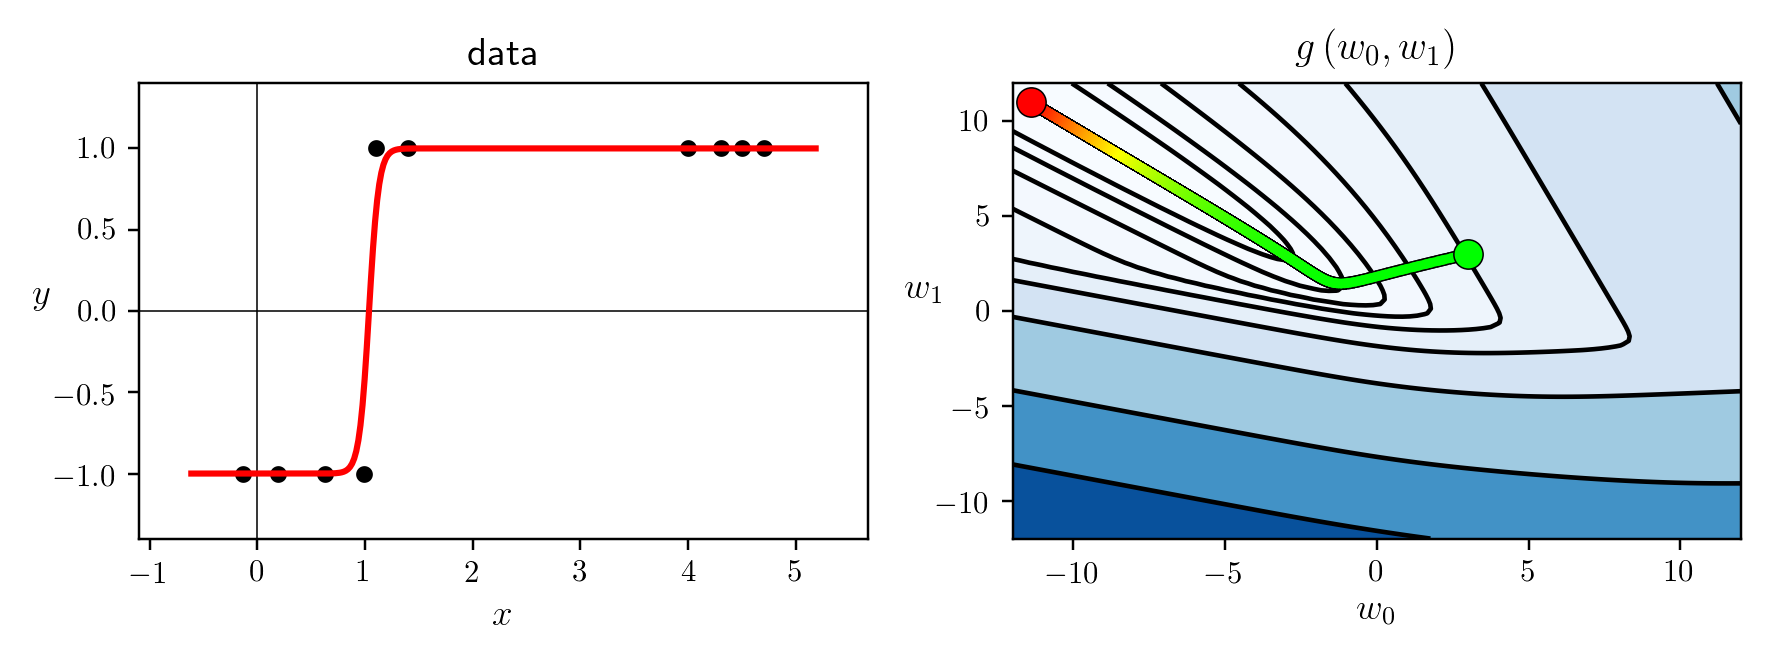

In [11]:
# This code cell will not be shown in the HTML version of this notebook
# run gradient descent to minimize the softmax cost
g = softmax; w = np.array([3.0,3.0])[:,np.newaxis]; max_its = 2000; alpha_choice = 1;
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

# create a static figure illustrating gradient descent steps 
animator = superlearn.classification_2d_demos.Visualizer(data,g)
animator.static_fig(weight_history,num_contours = 25,viewmax = 12)

## 'Noisy' datasets

- Below we show a multi-input ($N = 2$) dataset of 100 points.


- Here the two classes cannot be perfectly separated by any line.


- In the left panel we show the data in three dimensions, and in the right panel we show the data as viewed 'from above'.


- 'from above' means we're looking down from a point high up on the $y$ axis (or in other words, the data projected onto the plane $y = 0$).

<IPython.core.display.Javascript object>


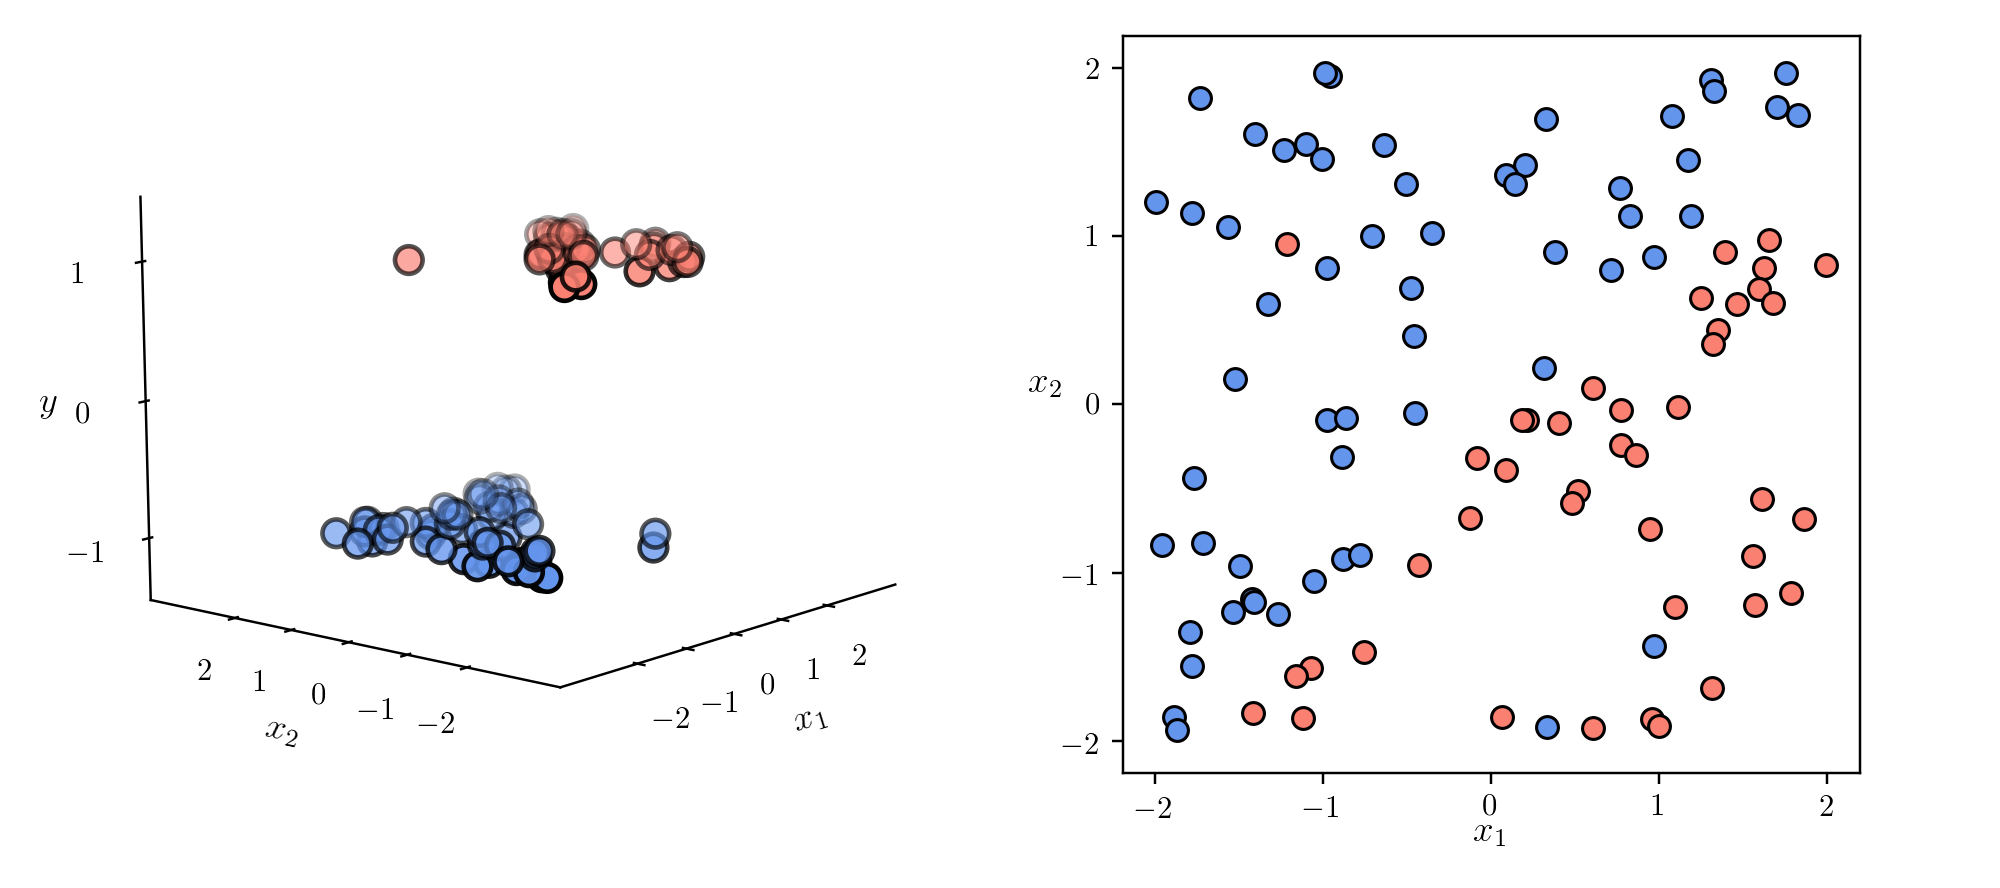

In [12]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
data = np.loadtxt(datapath + '3d_classification_data_v0.csv',delimiter = ',')

# create instance of linear regression demo, used below and in the next examples
demo = superlearn.classification_3d_demos.Visualizer(data)

# plot data
demo.plot_data(view = [15,-140])

- Other than these 'noisy' points the two classes look like they can be very well fit with our nonlinear regressor.


- In the classification context a 'noisy' point is one that has an incorrect label.  


- Such points are often *misclassified* by a trained classifier, meaning that their true label value will not be correctly predicted.  


- Two class classification datasets typically have noise of this kind and are not often perfectly separable by a hyperplane.  

- Even with the presence of noise we can still find the best parameters of a linear decision boundary for a dataset like this by minimizing the Softmax cost.  


- In the next ``Python`` cell we run $100$ steps of gradient descent with a random initialization and fixed steplenth $\alpha = 1$ to minimize the Softmax cost on this dataset.


- To ensure this is a proper steplength value we check the cost function history plot below.

<IPython.core.display.Javascript object>


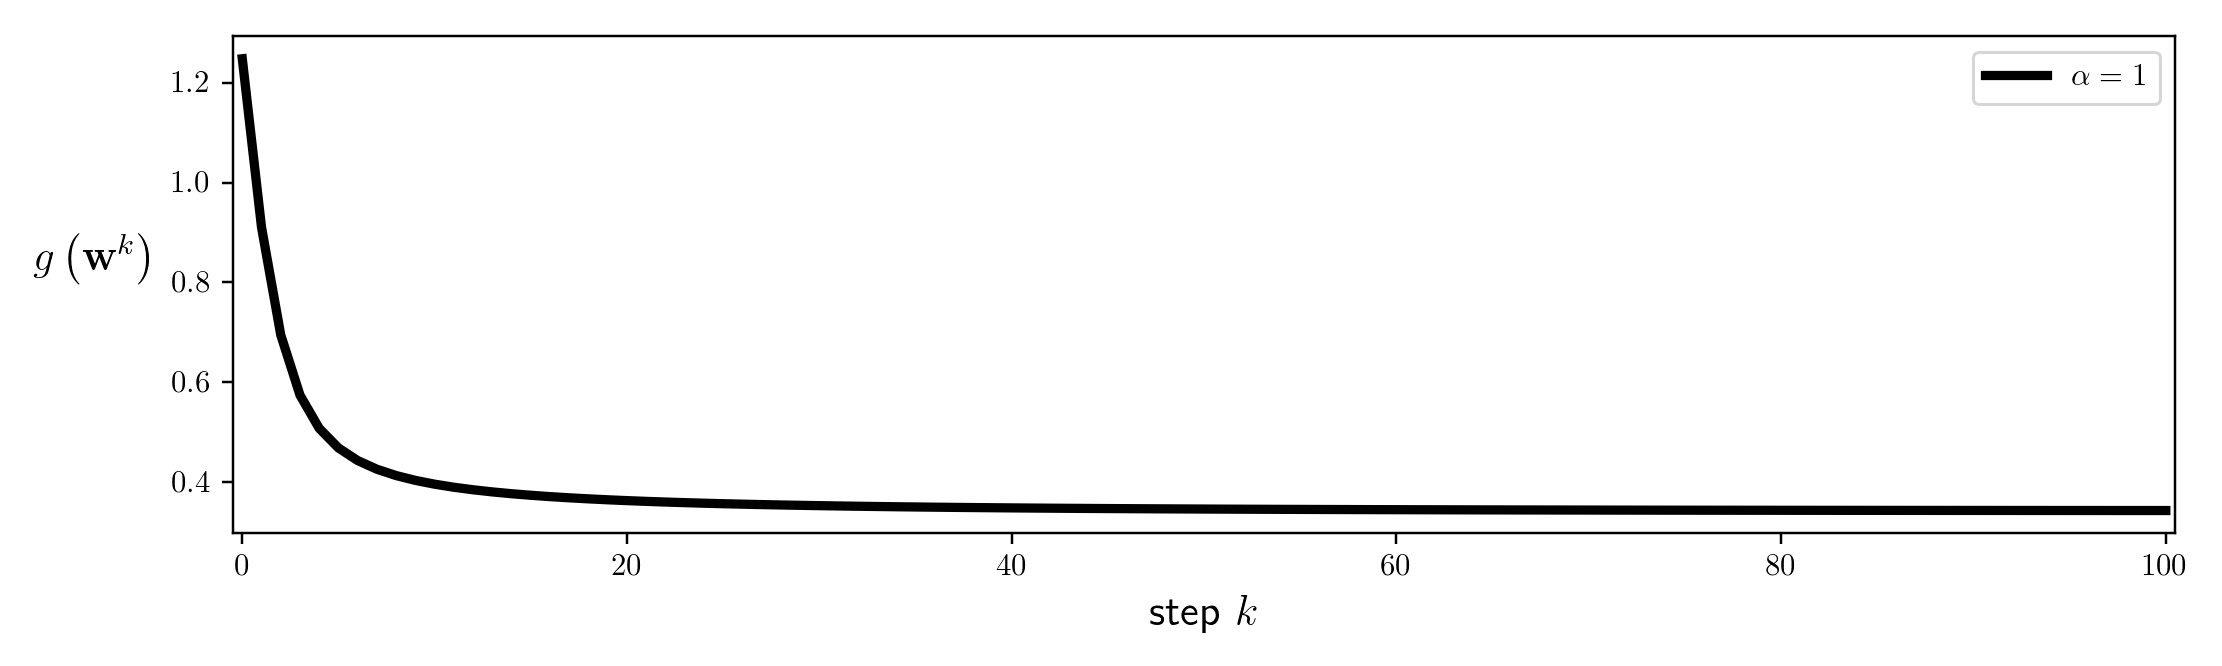

In [13]:
# This code cell will not be shown in the HTML version of this notebook
# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 

# run gradient descent to minimize the softmax cost
g = softmax; w = np.random.randn(3,1); max_its = 100; alpha_choice = 1;
weight_history,cost_history = optimizers.gradient_descent(g,alpha_choice,max_its,w)

# plot the cost function history for a given run
static_plotter.plot_cost_histories([cost_history],start = 0,points = False,labels = [r'$\alpha = 1$'])

<IPython.core.display.Javascript object>


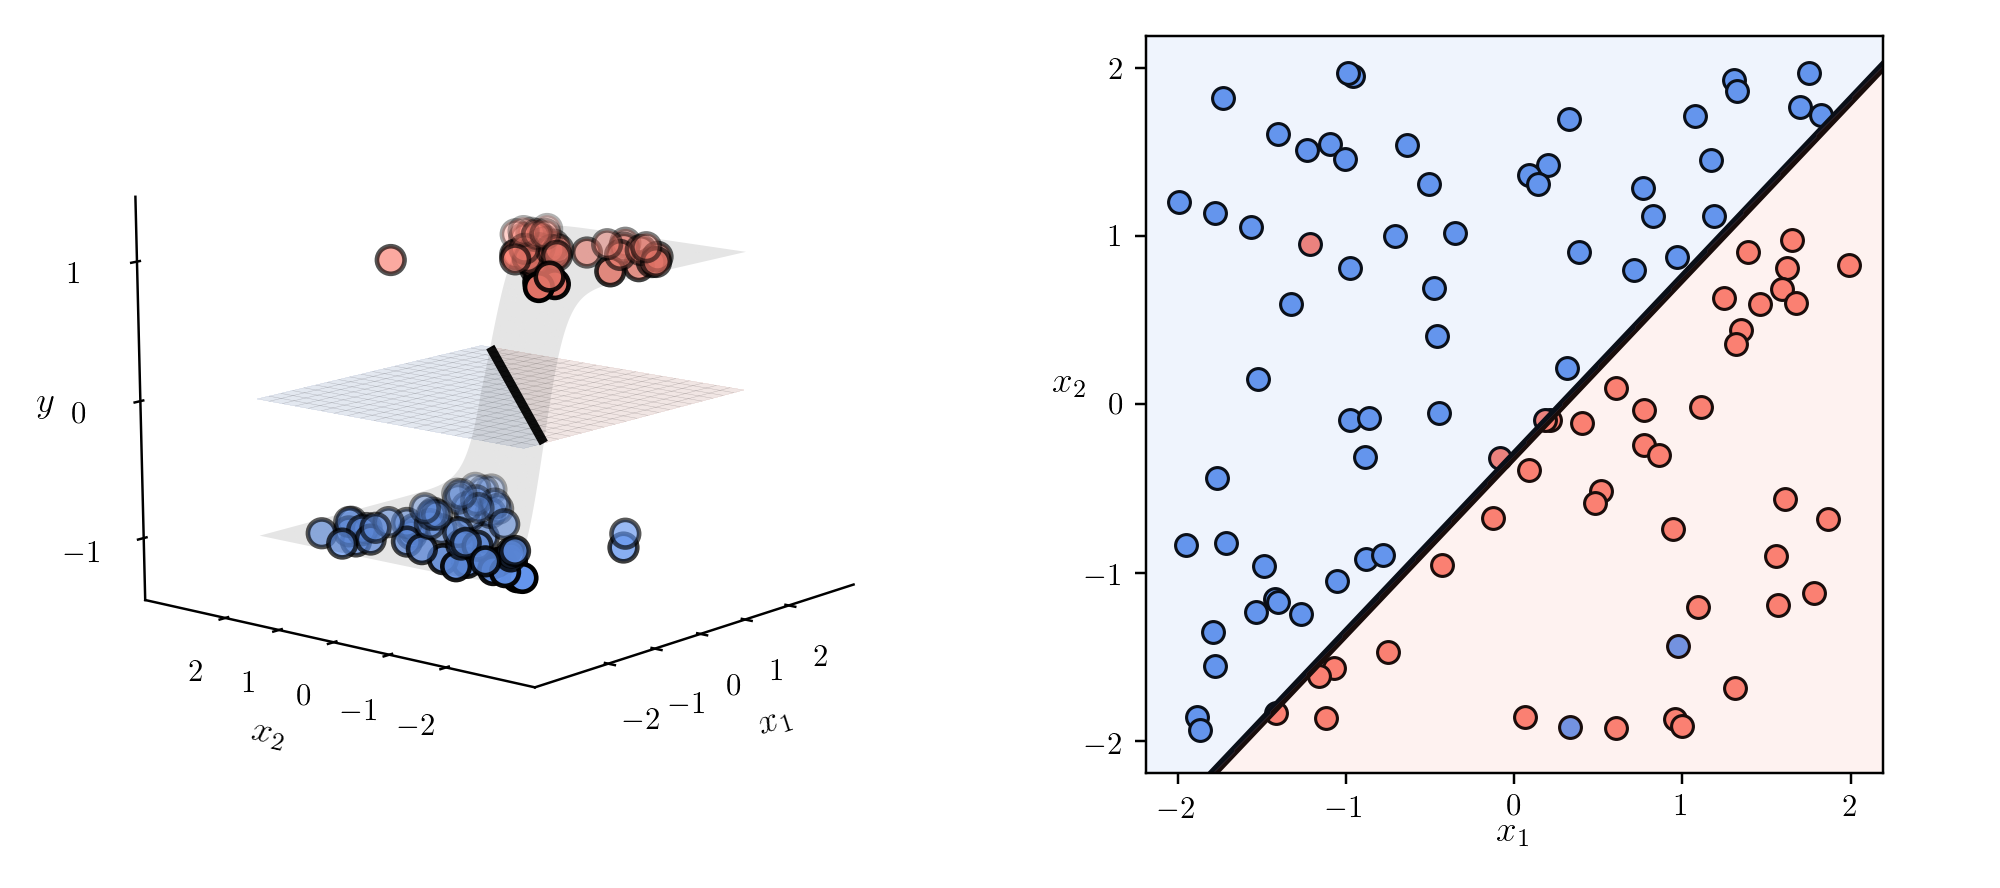

In [14]:
# This code cell will not be shown in the HTML version of this notebook
# create instance of 3d demos
demo = superlearn.classification_3d_demos.Visualizer(data)

# draw the final results
demo.static_fig(weight_history[-1],view = [15,-140])